# Estructurando el espacio urbano como redes

Normalmente nuestra tarea como analistas de datos espaciales implica describir, analizar y predecir procesos donde el espacio constituye una dimensión de interés. En ese intento, modelamos el espacio que nos interesa, construimos una abstracción que nos permite simpliflicar la mútliples dimensiones complejas del espacio urbano en un conjunto finito y manipulable de dimensiones. Estos modelos nos ayudan a comprender el fenómeno de estudio. 

Hasta ahora en nuestras clases hemos modelado el espacio urbano utilizando objetos geometricos sencillos, **puntos**, **lineas** y **polígonos** que constituyen representaciones espaciales-geográficas de los objetos de análisis que nos interesan (lineas y estaciones de subte o bicicletas públicas, agregados de hogares y viviendas del censo, etc). También utilizamos polígonos para representar unidades administrativas o institucionales que no necesariamente guardan relación con el proceso espacial que estamos analizando. 

Sin embargo, existe un objeto matemático de especial interés para el análisis espacial urbano: [el grafo](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_grafos). El mismo nace justamente a partir de [un problema de naturaleza urbana](https://es.wikipedia.org/wiki/Problema_de_los_puentes_de_K%C3%B6nigsberg). Los grafos estructuran el espacio a partir de nodos y arcos en lo que comunmente se denomina redes. Esto nos permite modelar el espacio localizando objetos en el espacio, de diverso tipo y con diversads propiedades (puntos, lineas) y al mismo tiempo establecer relaciones entre ellos. Por detrás de los grafos, existe un corpus teórico con herramientas estadísticas que nos ayudan a resolver problemas sencillos como el [algoritmo de Dijkstra para distancias más cortas](https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra) o complejos como el [problema del viajante](https://es.wikipedia.org/wiki/Problema_del_viajante) o su contracara el [problema del cartero](https://es.wikipedia.org/wiki/Problema_del_cartero_chino).

Para hacer eso de estas herramientas, lo haremos a través de la libreria desarrollada por el investigador de la Universidad de Berkeley [Geoff Boeing](https://geoffboeing.com/): [osmnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/). Osmnx es la suma de OpenStreetMap ([osm](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)) y Network X ([nx](https://networkx.github.io/documentation/stable/tutorial.html)). Lo que hace fundamentalmente es tomar la información existente en OSM a partir de mapeos colectivos y convertirla en grafos utilizando la libreria de Python para grafos `Network X`. 

En esta clase veremos una introducción a esta libreria que puede resultar de mucha utilidad. Para indagar  más recomiendo una serie de recursos:
- [El paper de la librería](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) 
- [El repositorio de GitHub de la libreria](https://github.com/gboeing/osmnx)
- [El repositorio con algunos ejemplos prácticos](https://github.com/gboeing/osmnx-examples)
- [Un post introductorio del blog de Boeing](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
- [La documentación oficial](https://osmnx.readthedocs.io/en/stable/)



In [39]:
#importamos la libreria
import osmnx as ox
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
ox.graph_from_point?

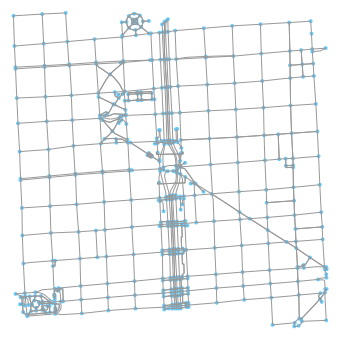

(<Figure size 524.11x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fabbdfe3dd8>)

In [5]:
#extraemos la informacion del espacio urbano en forma de grafos a partir de un punto
obelisco = (-34.60377,-58.38161)
G = ox.graph_from_point(center_point = obelisco, # elijo que punto utilizar
                        distance=750,            # la distancia 
                        network_type='all')      # el tipo de red
ox.plot_graph(G)

In [13]:
ox.graph_from_place?

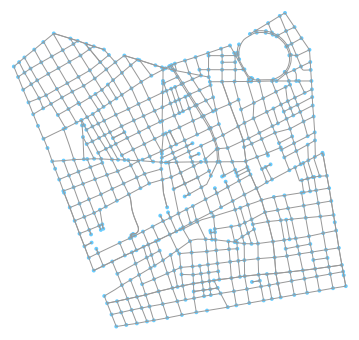

(<Figure size 555.616x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fabbcd81da0>)

In [20]:
# Tambien podemos partir de una unidad administrativa  
G = ox.graph_from_place(query = 'Caballito, Buenos Aires, Argentina', # elijo el lugar
                        network_type='drive'                          # el tipo de red
                       )
ox.plot_graph(G)

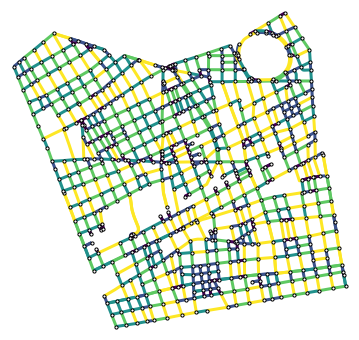

In [23]:
# podemos observar atirbutos del grafo como por ejemplo el largo de los arcos
ec = ox.get_edge_colors_by_attr(G, attr='length')
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=10, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

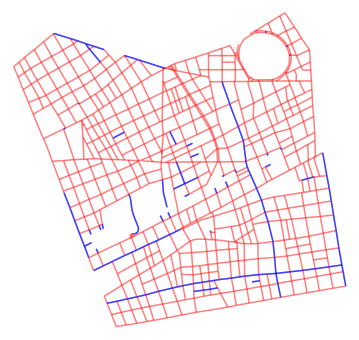

In [26]:
# o el sentido de las calles 
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

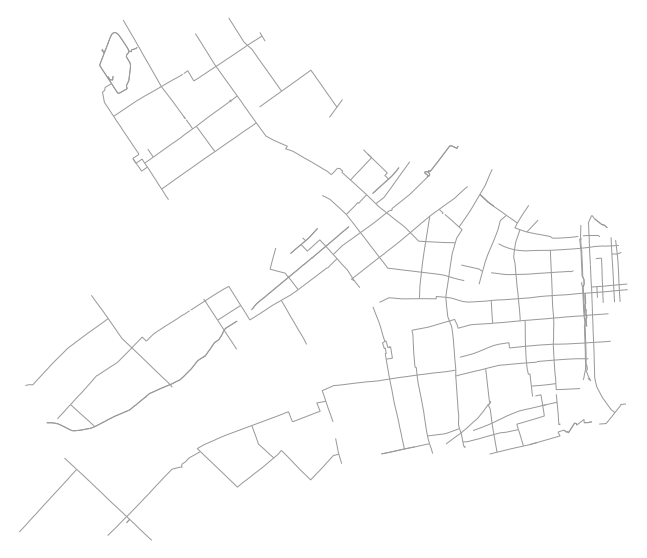

In [14]:
# obtenemos ciclovias
G = ox.graph_from_place(query = 'Buenos Aires, Argentina',
                        network_type='none',
                        infrastructure='way["bicycle"]' # puedo especificar todo tipo de infraestructura presente en OMS
                       )

fig, ax = ox.plot_graph(G, fig_height=10, node_size=0)

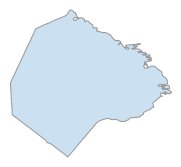

In [15]:
poligono = ox.gdf_from_place('Buenos Aires, Argentina')
fig, ax = ox.plot_shape(poligono, figsize=(3,3))

In [ ]:
ox.project_gdf?

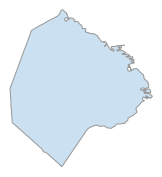

In [19]:
#podemos proyectar a otro CRS, UTM (Universal Transverse Mercator en metros) por defecto
poligono = ox.project_gdf(gdf = poligono) 
fig, ax = ox.plot_shape(poligono, figsize=(3,3))

In [27]:
poligono

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((359596.412 -3831486.255, 359598.465 ...","Autonomous City of Buenos Aires, Argentina",-34.526553,-34.705637,-58.335125,-58.531449


In [70]:
#convertir a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G)

In [ ]:
ox.save_graph_shapefile?

In [33]:
#guardar la red como archivos shapes separados
ox.save_graph_shapefile(G, filename='caballito_red', folder='../carto')


In [64]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [66]:
#guardar como grafo
ox.save_graphml(G, filename='network.graphml',folder='../carto')

In [37]:
arcos = gpd.read_file('../carto/caballito_red/edges/edges.shp')
arcos.head()

,key,osmid,oneway,name,highway,maxspeed,length,from,to,lanes,bridge,access,geometry
0,0,28628853,True,Juana de Ibarbourou,residential,40,100.543,81574365,81574368,None,None,None,"LINESTRING (-58.43515 -34.60359, -58.43474 -34..."
1,0,533676077,True,Avenida Ángel Gallardo,secondary,60,147.416,81574365,199457794,4,None,None,"LINESTRING (-58.43515 -34.60359, -58.43652 -34..."
2,0,291042085,True,Avenida Ángel Gallardo,secondary,60,135.404,199457836,81574365,4,None,None,"LINESTRING (-58.43389 -34.60295, -58.43475 -34..."
3,0,126149607,True,Avenida Patricias Argentinas,secondary,60,60.595,81574368,1135940970,2,None,None,"LINESTRING (-58.43474 -34.60443, -58.43504 -34..."
4,0,126149621,True,Juana de Ibarbourou,residential,40,22.807000000000002,81574368,1043120749,None,None,None,"LINESTRING (-58.43474 -34.60443, -58.43469 -34..."


In [38]:
nodos = gpd.read_file('../carto/caballito_red/nodes/nodes.shp')
nodos.head()

,osmid,highway,geometry
0,81574365,traffic_signals,POINT (-58.43515 -34.60359)
1,81574368,traffic_signals,POINT (-58.43474 -34.60443)
2,82529571,None,POINT (-58.44734 -34.60735)
3,82638850,traffic_signals,POINT (-58.45654 -34.60497)
4,82638851,traffic_signals,POINT (-58.45401 -34.60566)


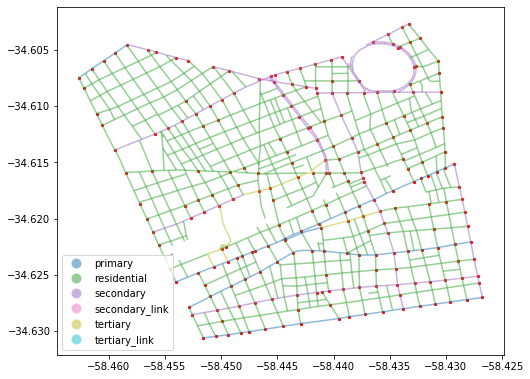

In [55]:
# podemos plotear los atributos
f,ax = plt.subplots(figsize = (8,8))
arcos.plot(ax=ax,alpha=0.5,column = 'highway',legend=True)
nodos.loc[nodos.highway == 'traffic_signals',].plot(ax=ax,markersize=5,color='red')


# Consultar directamente a OSM

La fuente de esta información es OpenStreetMap ([OSM](https://www.openstreetmap.org/)). Si bien `osmnx` ofrece una forma sencilla de extraer información, lo hace de un modo determinado y con un formato particular. Existe la posibilidad de extraer la información de la API de OSM ([Overpass API](https://wiki.openstreetmap.org/wiki/Overpass_API)) de manera directa. 

El proceso es más complejo de lo que este seminario abarca, aunque sobre fundamentos que ya visitamos en otros notebooks. Sin embargo respetando el espíritu de que estos notebooks le puedan servir en un futuro como material de consulta, queda en estas celdas un grupo de funciones que les permite a partir de una consulta a la API de OSM, procesarla como un GeoDataFrame de GeoPandas. El lenguaje de `Overpass API` es particular y requiere aprenderlo a parte siguiendo ejemplos sencillos y mediante prueba y error.  





In [56]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import os
import requests
import collections
import xml.etree.ElementTree as ET
import fiona.crs
import geopandas as gpd
from pandas.io.common import urlopen, urlencode
import pandas as pd
from shapely.geometry import Point, LineString
from six import string_types

OSMData = collections.namedtuple('OSMData', ('nodes', 'waynodes', 'waytags',
                                             'relmembers', 'reltags'))
_crs = fiona.crs.from_epsg(4326)

# Tags to remove so we don't clobber the output. This list comes from
# osmtogeojson's index.js (https://github.com/tyrasd/osmtogeojson)
uninteresting_tags = set([
    "source",
    "source_ref",
    "source:ref",
    "history",
    "attribution",
    "created_by",
    "tiger:county",
    "tiger:tlid",
    "tiger:upload_uuid"])


def read_osm(content, render=True, **kwargs):
    """
    Funcion wrapper principal
    """
    doc = ET.fromstring(content)
    
    #Leo por separado los nodos, los arcos y las relaciones
    nodes = read_nodes(doc) 
    waynodes, waytags = read_ways(doc)
    relmembers, reltags = read_relations(doc)
    
    #creo una colleccion donde guardo los datos
    data = OSMData(nodes, waynodes, waytags, relmembers, reltags)
    
    #convierto los datos en un geodataframe
    if render:
        data = render_to_gdf(data, **kwargs)

    return data


def read_nodes(doc):
    #   Example:
    #   <node id="1705717514" lat="42.3630798" lon="-71.0997601">
    #       <tag k="crossing" v="zebra"/>
    #       <tag k="highway" v="crossing"/>
    #       <tag k="source" v="Bing"/>
    #   </node>
    nodes = [_element_to_dict(xmlnode) for xmlnode in doc.findall('node')]
    nodes = _dict_to_dataframe(nodes)
    nodes['lon'] = nodes['lon'].astype(float)
    nodes['lat'] = nodes['lat'].astype(float)

    return nodes

def _element_to_dict(element):
    d = element.attrib.copy()
    for t in element.findall('tag'):
        k = t.attrib['k']
        if k not in uninteresting_tags:
            d[k] = t.attrib['v']

    return d

def _dict_to_dataframe(d):
    df = pd.DataFrame.from_dict(d)
    if 'timestamp' in df:
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    return df

def read_ways(doc):
    #   Example:
    #   <way id="8614593">
    #       <nd ref="61326730"/>
    #       <nd ref="61326036"/>
    #       <nd ref="61321194"/>
    #       <tag k="attribution" v="Office of Geographic and Environmental Information (MassGIS)"/>
    #       <tag k="condition" v="fair"/>
    #       <tag k="created_by" v="JOSM"/>
    #       <tag k="highway" v="residential"/>
    #       <tag k="lanes" v="2"/>
    #       <tag k="massgis:way_id" v="171099"/>
    #       <tag k="name" v="Centre Street"/>
    #       <tag k="source" v="massgis_import_v0.1_20071008165629"/>
    #       <tag k="width" v="13.4"/>
    #   </way>
    waytags = []
    waynodes = []
    for xmlway in doc.findall('way'):
        wayid = xmlway.attrib['id']
        for i, xmlnd in enumerate(xmlway.findall('nd')):
            d = xmlnd.attrib.copy()
            d['id'] = wayid
            d['index'] = i
            waynodes.append(d)

        tags = _element_to_dict(xmlway)
        waytags.append(tags)

    waynodes = _dict_to_dataframe(waynodes)
    waytags = _dict_to_dataframe(waytags)

    return waynodes, waytags


def read_relations(doc):
    # Example:
    #   <relation id="1933745">
    #     <member type="way" ref="134055159" role="outer"/>
    #     <member type="way" ref="260533047" role="outer"/>
    #     <member type="way" ref="142867799" role="outer"/>
    #     <member type="way" ref="134063352" role="outer"/>
    #     <member type="way" ref="142803038" role="outer"/>
    #     <member type="way" ref="134056144" role="outer"/>
    #     <member type="way" ref="134056141" role="outer"/>
    #     <tag k="admin_level" v="8"/>
    #     <tag k="boundary" v="administrative"/>
    #     <tag k="name" v="Cambridge"/>
    #     <tag k="type" v="boundary"/>
    #     <tag k="wikipedia" v="en:Cambridge, Massachusetts"/>
    #   </relation>
    reltags = []
    relmembers = []
    for xmlrel in doc.findall('relation'):
        relid = xmlrel.attrib['id']
        for i, xmlmember in enumerate(xmlrel.findall('member')):
            d = xmlmember.attrib.copy()
            d['id'] = relid
            d['index'] = i
            relmembers.append(d)

        tags = _element_to_dict(xmlrel)
        reltags.append(tags)

    relmembers = _dict_to_dataframe(relmembers)
    reltags = _dict_to_dataframe(reltags)

    return relmembers, reltags


def render_to_gdf(osmdata, drop_untagged=True):
    
    #renderizo por separado nodos y arcos
    nodes = render_nodes(osmdata.nodes, drop_untagged)
    ways = render_ways(osmdata.nodes, osmdata.waynodes, osmdata.waytags)
    
    if ways is not None:
        # We should get append working
        nodes = nodes.append(ways).set_geometry('geometry', crs=_crs)

    return nodes


def render_nodes(nodes, drop_untagged=True):
    # Drop nodes that have no tags, convert lon/lat to points
    if drop_untagged:
        nodes = nodes.dropna(subset=nodes.columns.drop(['id', 'lon', 'lat']),
                             how='all')
    points = [Point(x['lon'], x['lat']) for i, x in nodes.iterrows()]
    nodes = nodes.drop(['lon', 'lat'], axis=1)
    nodes = nodes.set_geometry(points, crs=_crs)

    return nodes


def render_ways(nodes, waynodes, waytags):
    if waynodes is None or waynodes.empty:
        return None

    node_points = nodes[['id', 'lon', 'lat']]

    def wayline(df):
        df = df.sort_index(by='index')[['lon', 'lat']]
        return LineString(df.values)

    # Group the ways and create a LineString for each one.  way_lines is a
    # Series where the index is the way id and the value is the LineString.
    # Merge it with the waytags to get a single GeoDataFrame of ways
    waynodes = waynodes.merge(node_points, left_on='ref', right_on='id',
                              suffixes=('', '_nodes'))
    way_lines = waynodes.groupby('id').apply(wayline)
    ways = waytags.set_index('id').set_geometry(way_lines, crs=_crs)
    ways.reset_index(inplace=True)

    return ways



In [57]:
#obtengo la url base de la API
overpass_url = "http://overpass-api.de/api/interpreter"

# Defino la consulta en el lenguaje de Overpass. Noten que el archivo que produce es en xml. 
# Esto lo vimos como posibilidad en la clase de APIs para la API de Google.
overpass_query = """
[out:xml];
way["highway"]
(-34.59811,-58.44945,-34.59275,-58.43855);
(._;>;);
out center;
"""
#realizamos la consulta, 
# haciendo pasar los parametros desde el parametro params de la funcion request.get como un diccionario
response = requests.get(overpass_url,
                        params={'data': overpass_query})


#procesamos el resultado como un geodataframe
geodt = read_osm(response.text)
geodt.shape

/home/pipe/Documents/untref/analisis_espacial_python_2019/vevn/lib/python3.6/site-packages/ipykernel_launcher.py:170: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
/home/pipe/Documents/untref/analisis_espacial_python_2019/vevn/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(211, 34)

In [62]:
#noten la cantidad de columnas que tiene el geodataframe
geodt.head()

,access,bench,bicycle,bus,crossing,cycleway,cycleway:left,description,enforcement,geometry,...,shelter,sidewalk,source:maxspeed,surface,tactile_paving,taxi,traffic_calming,traffic_signals,traffic_signals:direction,wheelchair
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.44583 -34.59334),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.44506 -34.59407),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.44347 -34.59550),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.44258 -34.59634),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.43528 -34.59081),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


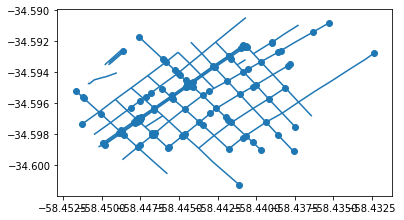

In [59]:
geodt.plot()

In [60]:

df = geodt[geodt.type == 'LineString']
df.to_file('../carto/overpass_data_lineas')

df = geodt[geodt.type == 'Point']
df.to_file('../carto/overpass_data_puntos')
